# **Important Imports**

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# **Loading Data**

In [3]:
# Fashion MNIST has 60000 training data points and 10000 validation data points.

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0, 21, 27]

115

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

### **Class Names**

In [7]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

### **Display Images**

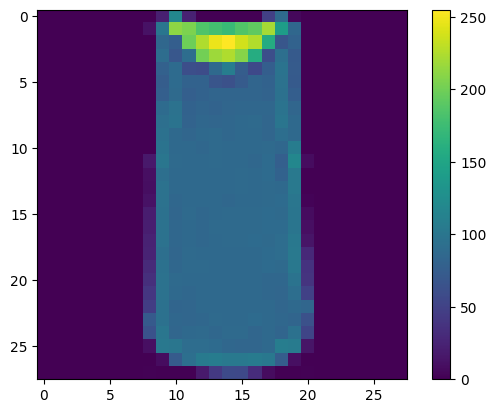

In [8]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

# **Data Preprocessing**

In [9]:
# Squishing Scale of Pixel data

## This is done to make sure that the weights and biases as in the same scale as the pixel values, i.e., [0,1]

train_images = train_images / 255.0

test_images = test_images / 255.0

# **Creating the Model**

### **Model Architecture**

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(196, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### **Compiling Model**

In [11]:
model.compile(  optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

### **Training Model**

In [12]:
model.fit(train_images, train_labels, epochs=5, validation_data= (test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4900 - accuracy: 0.8268 - val_loss: 0.3993 - val_accuracy: 0.8592
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3689 - accuracy: 0.8662 - val_loss: 0.3782 - val_accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3302 - accuracy: 0.8790 - val_loss: 0.3810 - val_accuracy: 0.8583
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3058 - accuracy: 0.8870 - val_loss: 0.3747 - val_accuracy: 0.8626
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2882 - accuracy: 0.8942 - val_loss: 0.3535 - val_accuracy: 0.8718


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print(f'{test_loss:.2f} | {test_acc:.2f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8718
0.35 | 0.87


1/1 [==============================] - 0s 49ms/step


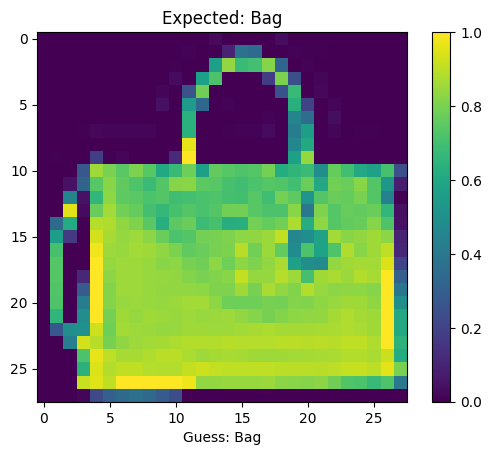

In [14]:
def make_guess(model, img, label):

    predictions = model.predict(np.array([img]))

    guess = class_names[np.argmax(predictions)]

    show_image(img, label, guess)

def show_image(img, label, guess):

    plt.figure()
    plt.imshow(img)
    plt.title('Expected: ' + label)
    plt.xlabel('Guess: ' + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_index():

    while True:
        index = input('Pick a Number: ')
        if index.isdigit():
            if 0 <= int(index) <= 5000:
                return int(index)
        else:
            print('Try Again!')

index = get_index()
img = test_images[index]
label = class_names[test_labels[index]]
make_guess(model, img, label)